In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

### Подготовка

In [72]:
df = pd.read_csv("clean_data.csv").head(200000)
columns_to_one_hot_encode = ['carrier', 'origin', 'dest']
columns_to_normalize = ['arr_delay', 'dep_delay', 'distance']

# One-hot encoding using Pandas
one_hot_encoded_df = pd.get_dummies(df[columns_to_one_hot_encode])

# Normalization using Pandas
normalized_df = (df[columns_to_normalize] - df[columns_to_normalize].mean()) / df[columns_to_normalize].std()

# Combine the processed data
processed_df = pd.concat([one_hot_encoded_df, normalized_df, df['is_long_flight']], axis=1)
processed_df

,carrier_9E,carrier_AA,carrier_AS,carrier_B6,carrier_DL,carrier_EV,carrier_F9,carrier_FL,carrier_HA,carrier_MQ,...,dest_STT,dest_SYR,dest_TPA,dest_TUL,dest_TYS,dest_XNA,arr_delay,dep_delay,distance,is_long_flight
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,0.129214,-0.244796,0.498274,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,0.353726,-0.188997,0.520322,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,0.678021,-0.244796,0.069715,False
3,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,-0.594213,-0.328494,0.740803,False
4,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,-0.768834,-0.467991,-0.380892,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,True,-0.244972,-0.467991,0.149639,False
199996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,-0.369701,0.117897,0.780765,False
199997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,-0.544322,-0.467991,-1.177379,False
199998,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,-0.569267,-0.440091,-0.121828,False


In [73]:
X = processed_df[['dep_delay']]  # Double brackets for DataFrame format

# Dependent variable (Target)
y = processed_df['arr_delay']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

### Линейная регрессия

In [74]:
lin = LinearRegression()
lin.fit(X_train, y_train)
lin_res = lin.predict(X_test)

In [75]:
b0 = lin_res.ravel()[X_test['dep_delay'].argmin()]
b1 = lin.coef_.ravel()[0]
print('Прямая: Y =', b0, '+', b1, 'x')
print('СКО =', mean_squared_error(X_test, lin_res.ravel()))
print('Коэффициент детерминации R2 =', r2_score(X_test, lin_res.ravel()))

Прямая: Y = -1.1060655420896137 + 0.905620183395981 x
СКО = 0.008702615269080132
Коэффициент детерминации R2 = 0.9910922524203153


<Axes: xlabel='dep_delay', ylabel='arr_delay'>

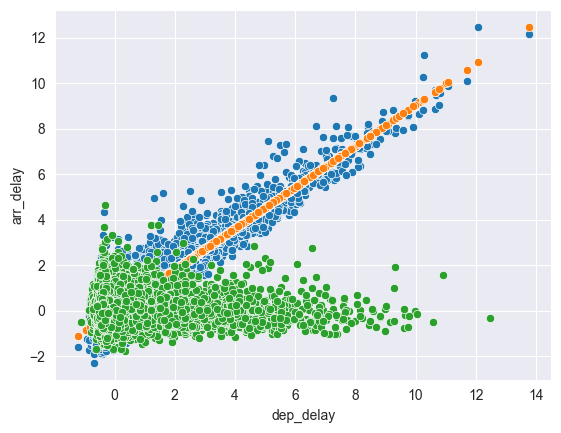

In [98]:
sns.scatterplot(y=y_test, x=X_test['dep_delay'])
sns.scatterplot(y=lin_res.ravel(), x=X_test['dep_delay'])
sns.scatterplot(y=y_test - lin_res.ravel(), x=lin_res.ravel())


<Axes: ylabel='arr_delay'>

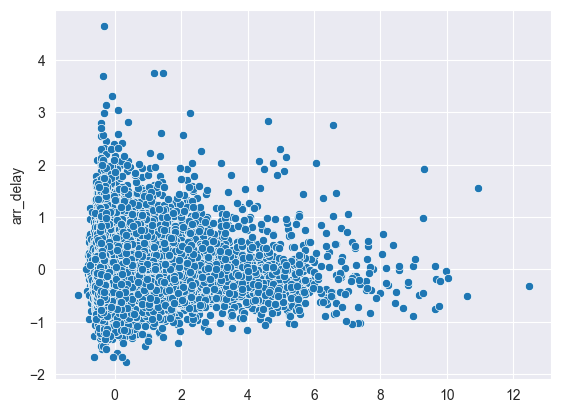

### LASSO

In [86]:
lasso_grid = GridSearchCV(estimator = Lasso(), param_grid = {'alpha':[0.001, 0.01, 0.1, 0.5, 0.9]})
lasso_grid.fit(X_train, y_train)
lasso = lasso_grid.best_estimator_
lasso_res = lasso.predict(X_test)
print("Best alpha value:", lasso_grid.best_estimator_.alpha)

Best alpha value: 0.001


In [80]:
b0 = lasso_res.ravel()[X_test['dep_delay'].argmin()]
b1 = lasso.coef_.ravel()[0]
print('Прямая: Y =', b0, '+', b1, 'x')
print('СКО =', mean_squared_error(X_test, lasso_res.ravel()))
print('Коэффициент детерминации R2 =', r2_score(X_test, lasso_res.ravel()))

Прямая: Y = -1.1048499395915121 + 0.904625892941193 x
СКО = 0.008886946738058855
Коэффициент детерминации R2 = 0.990903576011456


<Axes: xlabel='dep_delay', ylabel='arr_delay'>

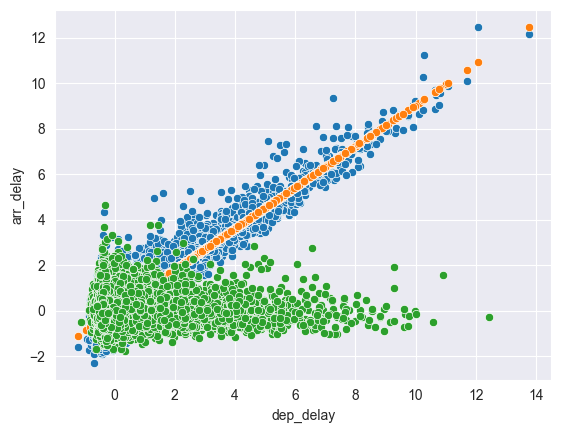

In [99]:
sns.scatterplot(y=y_test, x=X_test['dep_delay'])
sns.scatterplot(y=lasso_res.ravel(), x=X_test['dep_delay'])
sns.scatterplot(y=y_test - lasso_res.ravel(), x=lasso_res.ravel())

<Axes: ylabel='arr_delay'>

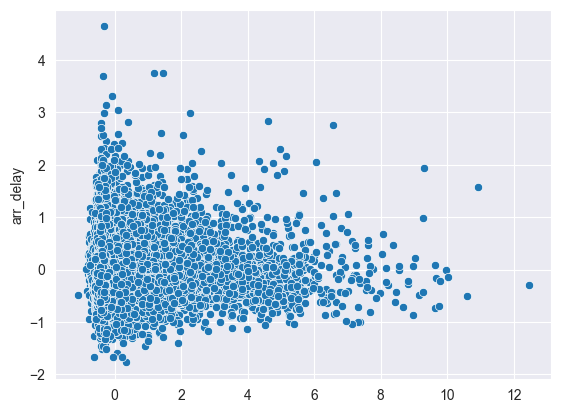

In [97]:
sns.scatterplot(y=y_test - lasso_res.ravel(), x=lasso_res.ravel())

In [85]:
ridge_grid = GridSearchCV(estimator = Ridge(), param_grid = {'alpha':[0.001, 0.01, 0.1, 0.5, 0.9]})
ridge_grid.fit(X_train, y_train)
ridge = ridge_grid.best_estimator_
ridge_res = ridge.predict(X_test)
print("Best alpha value:", ridge_grid.best_estimator_.alpha)   

Best alpha value: 0.9


In [84]:
b0 = ridge_res.ravel()[X_test['dep_delay'].argmin()]
b1 = ridge.coef_.ravel()[0]
print('Прямая: Y =', b0, '+', b1, 'x')
print('СКО =', mean_squared_error(X_test, ridge_res.ravel()))
print('Коэффициент детерминации R2 =', r2_score(X_test, ridge_res.ravel()))


Прямая: Y = -1.106059349707139 + 0.9056151183958705 x
СКО = 0.008703549373996354
Коэффициент детерминации R2 = 0.9910912962972938


<Axes: xlabel='dep_delay', ylabel='arr_delay'>

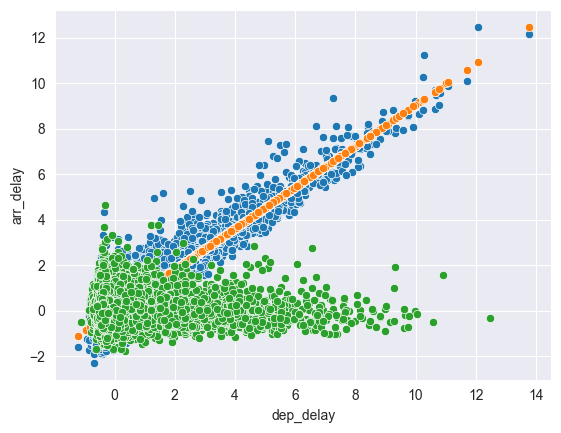

In [100]:
sns.scatterplot(y=y_test, x=X_test['dep_delay'])
sns.scatterplot(y=ridge_res.ravel(), x=X_test['dep_delay'])
sns.scatterplot(y=y_test - ridge_res.ravel(), x=ridge_res.ravel())

<Axes: ylabel='arr_delay'>

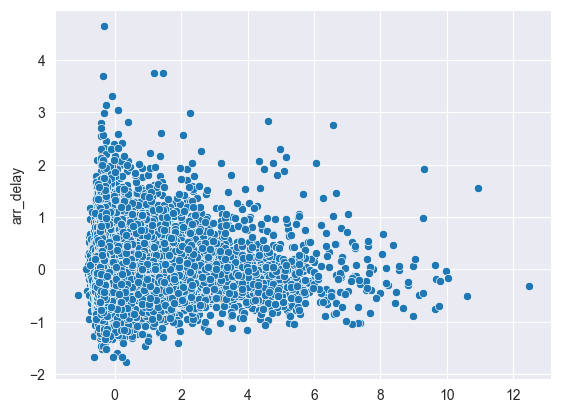

In [95]:
sns.scatterplot(y=y_test - ridge_res.ravel(), x=ridge_res.ravel())
